In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
%matplotlib inline

#method used for preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#models used for training/fitting data
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

#methods for training and optimizing model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, f1_score, precision_score, auc,roc_auc_score,roc_curve, precision_recall_curve
from sklearn.metrics import average_precision_score,confusion_matrix,precision_recall_curve,auc,roc_curve,recall_score,classification_report 

#methods for resampling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import ClusterCentroids,NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN,SMOTETomek
#from imblearn.ensemble import BalanceCascade

#ensemble methods
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier



#important feature
from sklearn.inspection import permutation_importance
import shap
#image shape setting
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('./Ponzi.xlsx')
df.head(10)

,address,lifetime,most active,active day,in vs out,num out,num in,num addr received,num addr sent,median delay,mean delay,minimum delay,maximum delay,total received BTC,total sent BTC,avg received BTC,avg sent BTC,48 diff,class
0,114Ap9G5nu78vESC648amPwSeqUorPtV5L,28329132,202,1035,1.004892,1022,1027,3430,3127,4369,2.739761e+04,-64,2881479,9.737518,9.746409,0.009528,0.009490,-200,1
1,1168Hc7aRi1azJPFRbCMGFvS1Q7R4taiZ3,1952932,67,14,0.126126,7,7,14,111,4559,1.502255e+05,473,1031864,0.084129,0.084129,0.012018,0.012018,-65,1
2,121iUY1czgXaQcEFrKKjbzMUdCquTQgPHL,17622640,71,165,1.000000,86,86,1625,360,25496,1.074551e+05,0,989807,76.400340,76.400340,0.888376,0.888376,-69,1
3,121jfy7iR2Q6HCNL3oZFDK2WTjigFZRAVb,103352586,26,348,1.000000,208,208,752,672,362,2.978461e+05,-427,102562674,44.303918,44.303918,0.213000,0.213000,22,1
4,121x1rbwtPk4jg48V42zv1CprdY5Lm1ozb,3172652,14,82,1.000000,53,53,201,148,0,3.916854e+04,-839,2754080,12.938357,12.938357,0.244120,0.244120,12,1
5,125LaznhCAssaRgtjbY3Fvi9jeLFKBaRdZ,42264038,185,79,1.000000,56,56,349,147,483,5.418466e+05,0,19998026,1.543845,1.543845,0.027569,0.027569,183,1
6,12CnPUD27HKqRq9vgfb8TJb1zeZeU2RiFs,38963350,251,27,1.000000,26,26,216,142,181310,1.498590e+06,0,21927555,6.476468,6.476468,0.249095,0.249095,99,1
7,12cny1s79PGLN9Dfyzk4mskaVRzDYgZEv3,535387,49,522,1.000000,517,517,1380,1273,0,1.027614e+03,-12,236120,17.138668,17.138668,0.033150,0.033150,45,1
8,12gPNyfAqzamDkhuZnbTY9dwCA8cuTwNZv,178506156,316,1163,1.000000,1158,1158,4312,10270,24363,1.536198e+05,0,69103402,45.446220,45.446220,0.039245,0.039245,-294,1
9,12PoNZiEtabwkCU4YFffshWNF1cRiAk5nq,38812331,201,4415,1.000680,4412,4415,5468,9244,0,8.793007e+03,-389,29340591,9020.589926,9020.658530,2.044558,2.043184,-199,1


In [3]:
df = df.dropna(axis=0, how='any')
df.shape

(6819, 19)

In [4]:
df['class'].unique()
df['class'].value_counts()

2    3526
0    3008
1     285
Name: class, dtype: int64

In [5]:
del df['address']
df.head()

,lifetime,most active,active day,in vs out,num out,num in,num addr received,num addr sent,median delay,mean delay,minimum delay,maximum delay,total received BTC,total sent BTC,avg received BTC,avg sent BTC,48 diff,class
0,28329132,202,1035,1.004892,1022,1027,3430,3127,4369,27397.61315,-64,2881479,9.737518,9.746409,0.009528,0.009490,-200,1
1,1952932,67,14,0.126126,7,7,14,111,4559,150225.53850,473,1031864,0.084129,0.084129,0.012018,0.012018,-65,1
2,17622640,71,165,1.000000,86,86,1625,360,25496,107455.12200,0,989807,76.400340,76.400340,0.888376,0.888376,-69,1
3,103352586,26,348,1.000000,208,208,752,672,362,297846.06920,-427,102562674,44.303918,44.303918,0.213000,0.213000,22,1
4,3172652,14,82,1.000000,53,53,201,148,0,39168.54321,-839,2754080,12.938357,12.938357,0.244120,0.244120,12,1


In [6]:
df.columns

Index(['lifetime', 'most active', 'active day', 'in vs out', 'num out',
       'num in', 'num addr received', 'num addr sent', 'median delay',
       'mean delay', 'minimum delay', 'maximum delay', 'total received BTC',
       'total sent BTC', 'avg received BTC', 'avg sent BTC', '48 diff',
       'class'],
      dtype='object')

In [7]:
def get_day(x):
    day_second = 60*60*24
    return int(x/day_second)

In [8]:
df['lifetime'] = df['lifetime'].map(get_day)

df['median delay'] = df['median delay'].map(get_day)

df['minimum delay'] = df['minimum delay'].map(get_day)

df['maximum delay'] = df['maximum delay'].map(get_day)

df['mean delay'] = df['mean delay'].map(get_day)

把以秒为单位的数据转化为天，因为其他数据基本都是以天为单位的，要不然单位差的太多，数据值会有太多出入

In [9]:
df.head()

,lifetime,most active,active day,in vs out,num out,num in,num addr received,num addr sent,median delay,mean delay,minimum delay,maximum delay,total received BTC,total sent BTC,avg received BTC,avg sent BTC,48 diff,class
0,327,202,1035,1.004892,1022,1027,3430,3127,0,0,0,33,9.737518,9.746409,0.009528,0.009490,-200,1
1,22,67,14,0.126126,7,7,14,111,0,1,0,11,0.084129,0.084129,0.012018,0.012018,-65,1
2,203,71,165,1.000000,86,86,1625,360,0,1,0,11,76.400340,76.400340,0.888376,0.888376,-69,1
3,1196,26,348,1.000000,208,208,752,672,0,3,0,1187,44.303918,44.303918,0.213000,0.213000,22,1
4,36,14,82,1.000000,53,53,201,148,0,0,0,31,12.938357,12.938357,0.244120,0.244120,12,1


In [10]:
X = df.iloc[:, df.columns != 'class']
y = df.iloc[:, df.columns == 'class']

In [11]:
#X = StandardScaler().fit_transform(X)
X = MinMaxScaler().fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0)

标准化，把数据处理为均值为0， 方差为1的数据 归一化，把数据压缩到 0-1 之间，利于模型计算 使用支持向量机等计算量很大的模型，对于数据的标准处理还是有很高要求的

In [13]:
# oversampling & undersampling

In [14]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [15]:
ros = RandomOverSampler(random_state=42)
#ros.fit(X_train, y_train)
X_over, y_over = ros.fit_resample(X_train, y_train)
print(X.shape)
print(X_over.shape)

(6819, 17)
(9546, 17)


In [16]:
rus = RandomUnderSampler(random_state=42)
# resampling X, y
X_under, y_under = rus.fit_resample(X_train, y_train)
print(X.shape)
print(X_under.shape)

(6819, 17)
(762, 17)


# STOME

In [17]:
from imblearn.over_sampling import SMOTE

model_smote = SMOTE()
#resample based on smote
X_train_smote,y_train_smote = model_smote.fit_resample(X_train,y_train)

In [18]:
#change after SMOTE
print(X.shape)
print(X_train_smote.shape)

(6819, 17)
(9546, 17)


In [19]:
print(y.shape)
print(y_train_smote.shape)

(6819, 1)
(9546, 1)


In [20]:
#train test split
#X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(smote_X, smote_y, test_size=0.1,random_state=0)

# STOMEENN

In [21]:
from imblearn.combine import SMOTEENN 

In [22]:
sme = SMOTEENN('not majority',random_state=42)
X_train_sme, y_train_sme = sme.fit_resample(X_train, y_train)

In [23]:
#change after STOMEENN
print(X.shape)
print(X_train_sme.shape)

(6819, 17)
(5645, 17)


In [24]:
#X_train_sme, X_test_sme, y_train_sme, y_test_sme = train_test_split(X_sme, y_sme, test_size=0.1,random_state=0)

 # ADASYN

In [25]:
from imblearn.over_sampling import ADASYN

In [26]:
syn = ADASYN('not majority',random_state=42)
X_train_syn, y_train_syn = syn.fit_sample(X_train, y_train)

In [27]:
#change after ADASYN
# print(X.shape)
# print(X_train_syn)

In [28]:
#X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(X_syn, y_syn, test_size=0.1,random_state=0)

# TomekLinks

In [29]:
from imblearn.under_sampling import TomekLinks 

In [30]:
# define the undersampling method
tme = TomekLinks('not majority')#random_state=42

In [31]:
X_train_tme,y_train_tme = tme.fit_sample(X_train, y_train)

In [32]:
#change after TomekLinks
print(X.shape)
print(X_train_tme.shape)

(6819, 17)
(5743, 17)


In [33]:
#train test split
#X_train_tme, X_test_tme, y_train_tme, y_test_tme = train_test_split(X_tme, y_tme, test_size=0.1,random_state=0)                                      

# SVM 

In [34]:
svm = SVC(kernel='rbf'
          ,degree=3
          ,random_state=0)

In [35]:
def get_score(y_test, y_pred):
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    precision = precision_score(y_test, y_pred, average="weighted")
    accuracy = accuracy_score(y_test, y_pred)
    print('''
    Recall = {},
    F1_score = {}
    precision = {} 
    accuracy = {}
    '''.format(recall, f1,precision, accuracy))

### oversampling

In [36]:
svm.fit(X_over, y_over)

y_pred_over = svm.predict(X_test)

get_score(y_test, y_pred_over)



    Recall = 0.6158357771260997,
    F1_score = 0.6005941926990812
    precision = 0.662996465641649 
    accuracy = 0.6158357771260997
    


In [37]:
cm_over_svm = confusion_matrix(y_pred_over, y_test)
print(cm_over_svm)


[[120   8  27]
 [ 12   9  26]
 [175  14 291]]


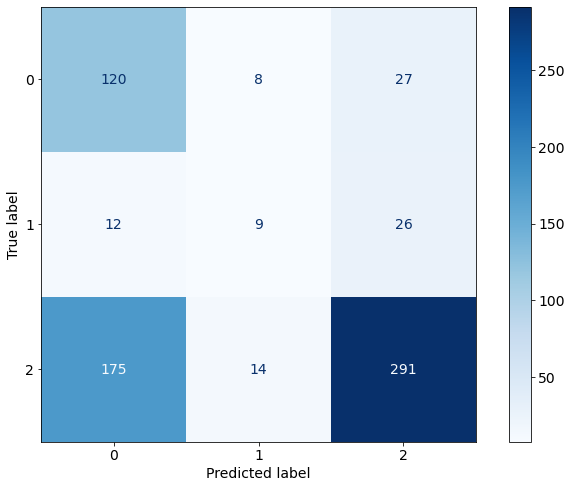

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_over_svm)#, display_labels=class_names)#cmap=plt.cm.Blues

disp = disp.plot(cmap=plt.cm.Blues)#,values_format='g')
plt.show()
#plt.savefig('confusion_matrix_SMOTE_SVM.png')


In [39]:
print(classification_report(y_test,y_pred_over))

              precision    recall  f1-score   support

           0       0.77      0.39      0.52       307
           1       0.19      0.29      0.23        31
           2       0.61      0.85      0.71       344

    accuracy                           0.62       682
   macro avg       0.52      0.51      0.49       682
weighted avg       0.66      0.62      0.60       682



### undersampling

In [40]:
svm.fit(X_under, y_under)

y_pred_under = svm.predict(X_test)

get_score(y_test, y_pred_under)


cm_under_svm = confusion_matrix(y_pred_under, y_test)
print(cm_under_svm)


    Recall = 0.6173020527859238,
    F1_score = 0.5847746923259821
    precision = 0.6808069302472889 
    accuracy = 0.6173020527859238
    
[[103   6  15]
 [  6   6  17]
 [198  19 312]]


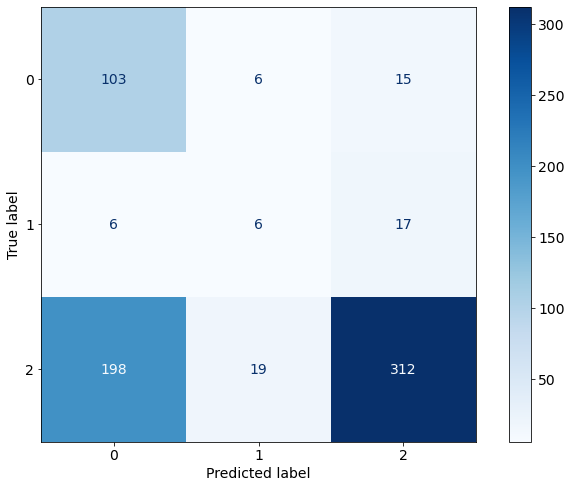

              precision    recall  f1-score   support

           0       0.83      0.34      0.48       307
           1       0.21      0.19      0.20        31
           2       0.59      0.91      0.71       344

    accuracy                           0.62       682
   macro avg       0.54      0.48      0.46       682
weighted avg       0.68      0.62      0.58       682



In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_under_svm)#, display_labels=class_names)#cmap=plt.cm.Blues

disp = disp.plot(cmap=plt.cm.Blues)#,values_format='g')
plt.show()
#plt.savefig('confusion_matrix_SMOTE_SVM.png')

print(classification_report(y_test,y_pred_under))

### smote 

In [42]:
svm.fit(X_train_smote, y_train_smote)

SVC(random_state=0)

In [43]:
y_pred_smote = svm.predict(X_test)

In [44]:
get_score(y_test, y_pred_smote)


    Recall = 0.6158357771260997,
    F1_score = 0.6013081068146252
    precision = 0.6679220256691543 
    accuracy = 0.6158357771260997
    


In [45]:
cm_smote_svm = confusion_matrix(y_pred_smote, y_test)
print(cm_smote_svm)

[[119   9  24]
 [ 14   9  28]
 [174  13 292]]


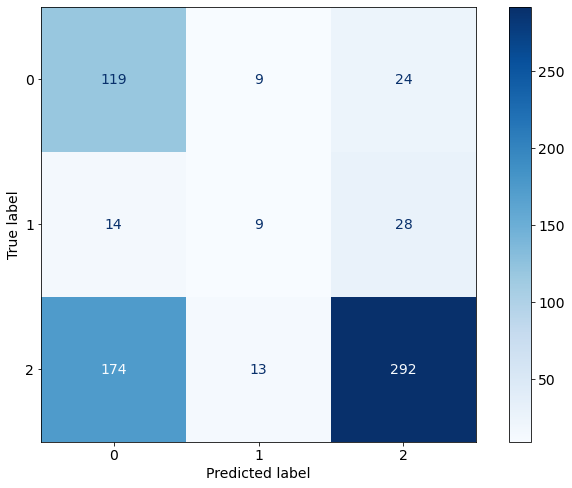

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_smote_svm)#, display_labels=class_names)#cmap=plt.cm.Blues
#disp.ax.set_title('SMOTE SVM')
disp = disp.plot(cmap=plt.cm.Blues)#,values_format='g')
plt.show()
#plt.savefig('confusion_matrix_SMOTE_SVM.png')

In [47]:
print(classification_report(y_test,y_pred_smote))

              precision    recall  f1-score   support

           0       0.78      0.39      0.52       307
           1       0.18      0.29      0.22        31
           2       0.61      0.85      0.71       344

    accuracy                           0.62       682
   macro avg       0.52      0.51      0.48       682
weighted avg       0.67      0.62      0.60       682



### STOMEENN

In [48]:
svm.fit(X_train_sme, y_train_sme)

SVC(random_state=0)

In [49]:
y_pred_sme = svm.predict(X_test)


In [50]:
get_score(y_test, y_pred_sme)



    Recall = 0.5498533724340176,
    F1_score = 0.5356512512152384
    precision = 0.7151296640897374 
    accuracy = 0.5498533724340176
    


In [51]:
cm_sme_svm = confusion_matrix(y_pred_sme, y_test)
print(cm_sme_svm)

[[ 73   3   7]
 [ 71  18  53]
 [163  10 284]]


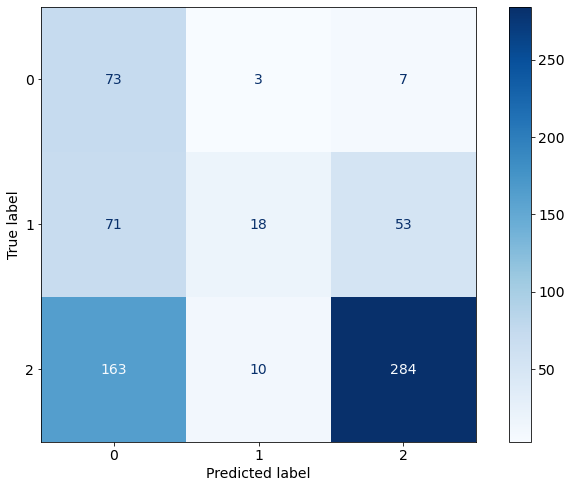

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_sme_svm)#, display_labels=class_names)#cmap=plt.cm.Blues
#disp.ax.set_title('SMOTE SVM')
disp = disp.plot(cmap=plt.cm.Blues)#,values_format='g')
plt.show()
#plt.savefig('confusion_matrix_SMOTEENN_SVM.png')

In [53]:
print(classification_report(y_test,y_pred_sme))

              precision    recall  f1-score   support

           0       0.88      0.24      0.37       307
           1       0.13      0.58      0.21        31
           2       0.62      0.83      0.71       344

    accuracy                           0.55       682
   macro avg       0.54      0.55      0.43       682
weighted avg       0.72      0.55      0.54       682



### ADASYN

In [54]:
svm.fit(X_train_syn, y_train_syn)

SVC(random_state=0)

In [55]:
y_pred_syn = svm.predict(X_test)

In [56]:
get_score(y_test, y_pred_syn)


    Recall = 0.6026392961876833,
    F1_score = 0.5912797323688413
    precision = 0.6791596046004731 
    accuracy = 0.6026392961876833
    


In [57]:
cm_syn_svm = confusion_matrix(y_pred_syn, y_test)
print(cm_syn_svm)

[[111   8  18]
 [ 24  10  36]
 [172  13 290]]


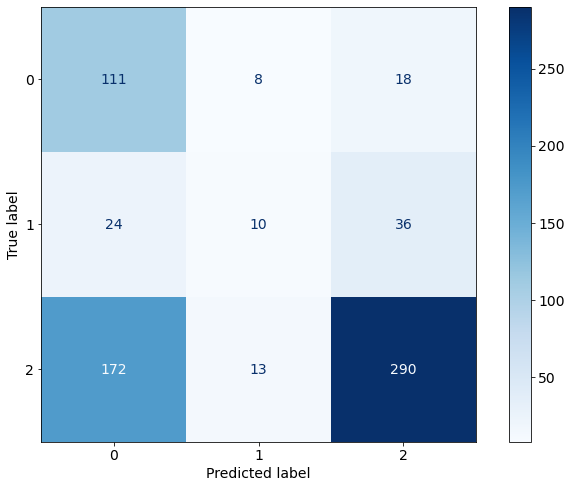

<Figure size 864x576 with 0 Axes>

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_syn_svm)#, display_labels=class_names)#cmap=plt.cm.Blues
disp = disp.plot(cmap=plt.cm.Blues)#,values_format='g')
plt.show()
plt.savefig('confusion_matrix_ADASYN_SVM.png')

In [59]:
print(classification_report(y_test,y_pred_syn))

              precision    recall  f1-score   support

           0       0.81      0.36      0.50       307
           1       0.14      0.32      0.20        31
           2       0.61      0.84      0.71       344

    accuracy                           0.60       682
   macro avg       0.52      0.51      0.47       682
weighted avg       0.68      0.60      0.59       682



### TomekLinks

In [60]:
svm.fit(X_train_tme, y_train_tme)

SVC(random_state=0)

In [61]:
y_pred_tme = svm.predict(X_test)

In [62]:
get_score(y_test, y_pred_tme)


    Recall = 0.6524926686217009,
    F1_score = 0.6081980451769827
    precision = 0.7390791577571976 
    accuracy = 0.6524926686217009
    


In [63]:
cm_tme_svm = confusion_matrix(y_pred_tme, y_test)
print(cm_tme_svm)

[[110   6  11]
 [  0   2   0]
 [197  23 333]]


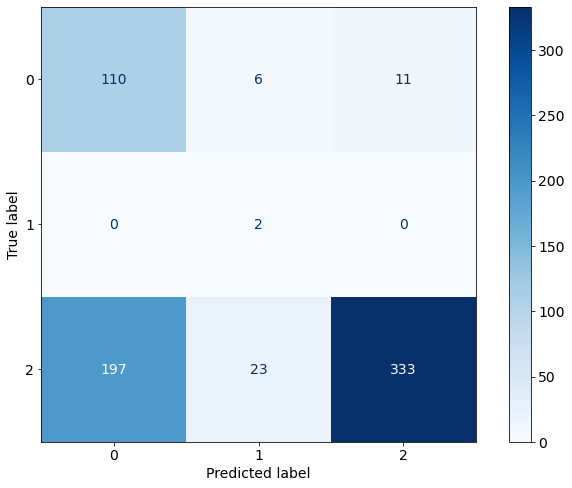

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tme_svm)#, display_labels=class_names)#cmap=plt.cm.Blues
disp = disp.plot(cmap=plt.cm.Blues)#,values_format='g')
plt.show()
#plt.savefig('confusion_matrix_TomekLinks_SVM.png')

In [65]:
print(classification_report(y_test,y_pred_tme))

              precision    recall  f1-score   support

           0       0.87      0.36      0.51       307
           1       1.00      0.06      0.12        31
           2       0.60      0.97      0.74       344

    accuracy                           0.65       682
   macro avg       0.82      0.46      0.46       682
weighted avg       0.74      0.65      0.61       682



# Random Forest 

In [66]:
rfc = RandomForestClassifier(
    n_estimators=100,                    
    class_weight=None,
    min_samples_leaf=3,
)

### oversampling

In [67]:
rfc.fit(X_over, y_over)
rfc.score(X_test, y_test)
rfc_pred_over = rfc.predict(X_test)
get_score(rfc_pred_over, y_test)
cm_over_rf = confusion_matrix(rfc_pred_over, y_test)
print(cm_over_rf)


    Recall = 0.8812316715542522,
    F1_score = 0.8834822265523263
    precision = 0.8863267726433266 
    accuracy = 0.8812316715542522
    
[[269  10  24]
 [ 13  12   0]
 [ 25   9 320]]


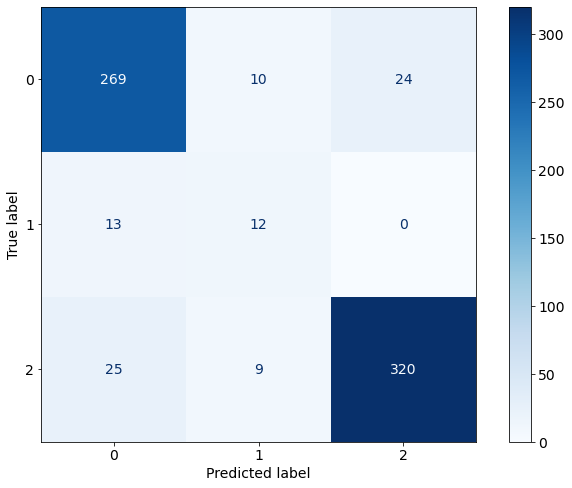

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       307
           1       0.48      0.39      0.43        31
           2       0.90      0.93      0.92       344

    accuracy                           0.88       682
   macro avg       0.76      0.73      0.74       682
weighted avg       0.88      0.88      0.88       682



In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_over_rf )#, display_labels=class_names)#cmap=plt.cm.Blues
disp = disp.plot(cmap=plt.cm.Blues)#,values_format='g')
plt.show()
#plt.savefig('confusion_matrix_smote_rf.png')

print(classification_report(y_test,rfc_pred_over))

In [69]:
### important feature

In [70]:
rfc.feature_importances_

array([0.05094522, 0.05289527, 0.08261017, 0.10386563, 0.05101823,
       0.0655738 , 0.09384967, 0.05529333, 0.01111585, 0.0244045 ,
       0.01258897, 0.04162225, 0.05125368, 0.05483906, 0.10328833,
       0.09385137, 0.05098468])

Text(0.5, 0, 'Random Forest Feature Importance with Oversampling')

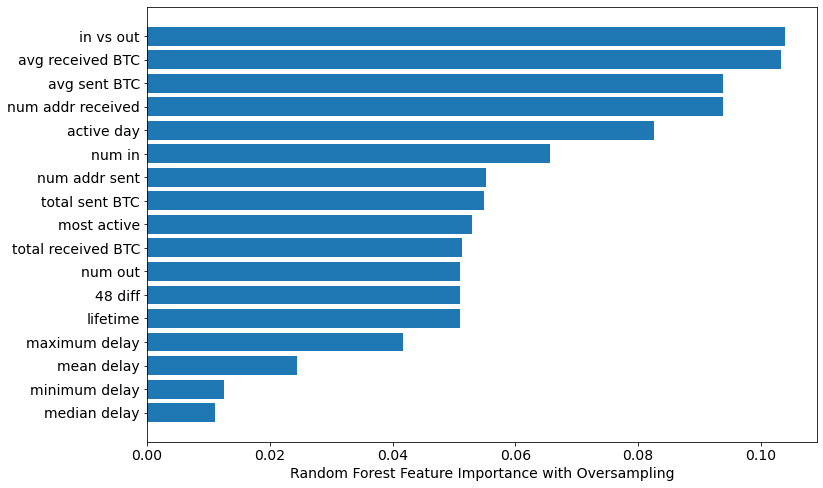

In [71]:
sorted_idx = rfc.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], rfc.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance with Oversampling")

### undersampling

In [72]:
rfc.fit(X_under, y_under)
rfc.score(X_test, y_test)
rfc_pred_under = rfc.predict(X_test)
get_score(rfc_pred_under, y_test)
cm_under_rf = confusion_matrix(rfc_pred_under, y_test)
print(cm_under_rf)


    Recall = 0.7551319648093842,
    F1_score = 0.7138439544064047
    precision = 0.7400941305612112 
    accuracy = 0.7551319648093842
    
[[222   3  19]
 [ 58  20  52]
 [ 27   8 273]]


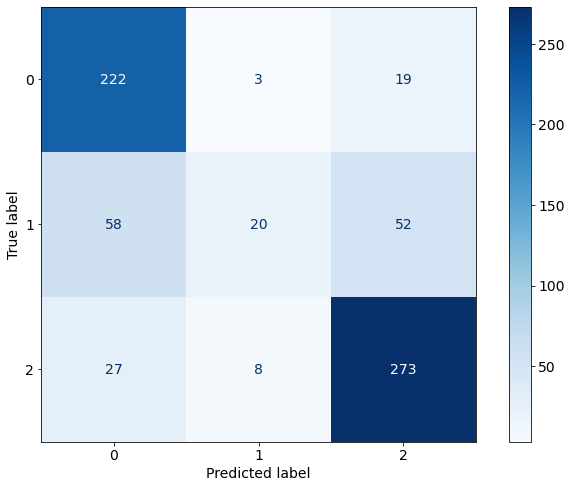

              precision    recall  f1-score   support

           0       0.91      0.72      0.81       307
           1       0.15      0.65      0.25        31
           2       0.89      0.79      0.84       344

    accuracy                           0.76       682
   macro avg       0.65      0.72      0.63       682
weighted avg       0.86      0.76      0.80       682



In [73]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_under_rf )#, display_labels=class_names)#cmap=plt.cm.Blues
disp = disp.plot(cmap=plt.cm.Blues)#,values_format='g')
plt.show()
#plt.savefig('confusion_matrix_smote_rf.png')

print(classification_report(y_test,rfc_pred_under))

In [74]:
### important feature

In [75]:
rfc.feature_importances_


array([0.04858143, 0.04884332, 0.07484921, 0.09788962, 0.05592656,
       0.06036328, 0.09657254, 0.05136757, 0.00945705, 0.021965  ,
       0.00926389, 0.04189424, 0.06585779, 0.050203  , 0.10783525,
       0.11168998, 0.04744028])

Text(0.5, 0, 'Random Forest Feature Importance with Undersampling')

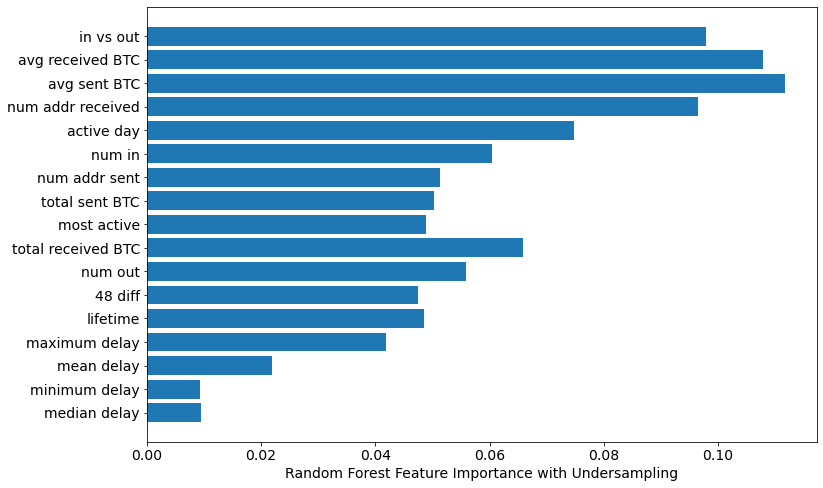

In [76]:
orted_idx = rfc.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], rfc.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance with Undersampling")

### smote 

In [77]:
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(min_samples_leaf=3)

In [78]:
rfc.score(X_test, y_test)

0.8695014662756598

In [79]:
rfc_pred_smote = rfc.predict(X_test)

In [80]:
get_score(rfc_pred_smote, y_test)


    Recall = 0.8695014662756598,
    F1_score = 0.8640409733733672
    precision = 0.8623757827704751 
    accuracy = 0.8695014662756598
    


In [81]:
cm_smote_rf = confusion_matrix(rfc_pred_smote, y_test)
print(cm_smote_rf)

[[260   6  21]
 [ 24  17   7]
 [ 23   8 316]]


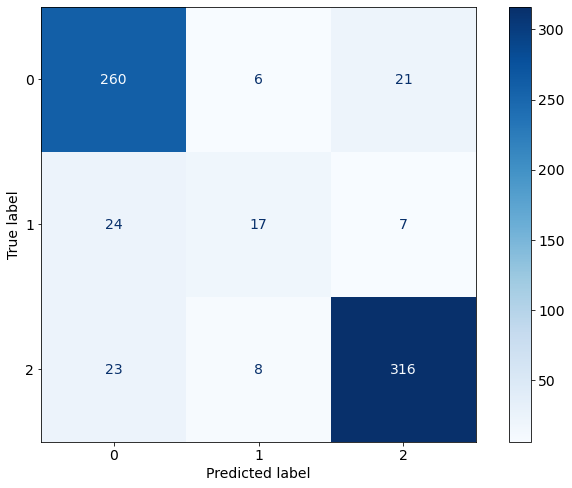

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_smote_rf )#, display_labels=class_names)#cmap=plt.cm.Blues
disp = disp.plot(cmap=plt.cm.Blues)#,values_format='g')
plt.show()
#plt.savefig('confusion_matrix_smote_rf.png')

In [83]:
print(classification_report(y_test,rfc_pred_smote))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       307
           1       0.35      0.55      0.43        31
           2       0.91      0.92      0.91       344

    accuracy                           0.87       682
   macro avg       0.72      0.77      0.74       682
weighted avg       0.88      0.87      0.87       682



In [84]:
### important feature
rfc.feature_importances_

array([0.05623406, 0.05292951, 0.07873316, 0.11157905, 0.05704883,
       0.0538567 , 0.07757342, 0.04488884, 0.02491182, 0.03597993,
       0.01420622, 0.04715504, 0.03806202, 0.07005754, 0.08619769,
       0.0996884 , 0.05089777])

Text(0.5, 0, 'Random Forest Feature Importance with SMOTE')

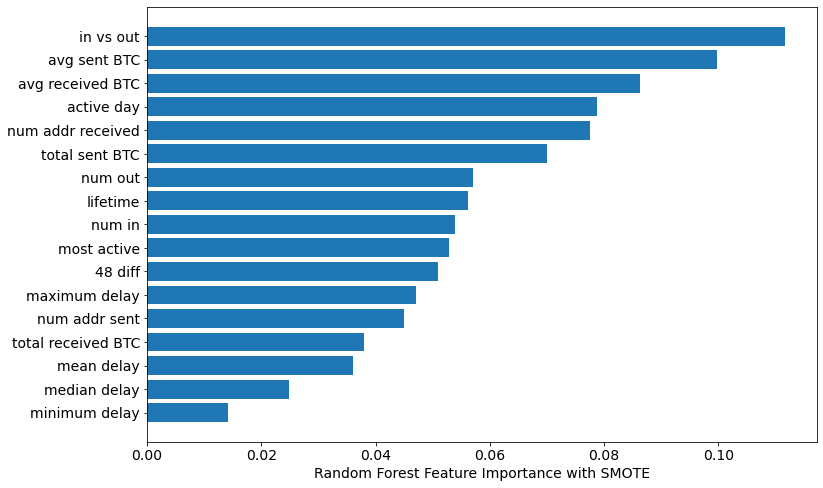

In [85]:
sorted_idx = rfc.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], rfc.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance with SMOTE")

### STOMEENN

In [86]:
rfc.fit(X_train_sme, y_train_sme)

RandomForestClassifier(min_samples_leaf=3)

In [87]:
rfc.score(X_test, y_test)

0.8137829912023461

In [88]:
rfc_pred_sme = rfc.predict(X_test)

In [89]:
get_score(rfc_pred_sme, y_test)


    Recall = 0.8137829912023461,
    F1_score = 0.7837475718972801
    precision = 0.7984943118511008 
    accuracy = 0.8137829912023461
    


In [90]:
cm_sme_rf = confusion_matrix(rfc_pred_sme, y_test)
print(cm_sme_rf)

[[236   4   8]
 [ 47  20  37]
 [ 24   7 299]]


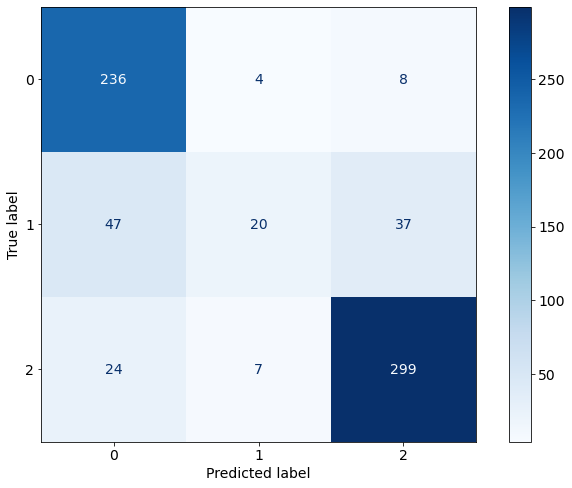

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_sme_rf )#, display_labels=class_names)#cmap=plt.cm.Blues
disp = disp.plot(cmap=plt.cm.Blues)#,values_format='g')
plt.show()
#plt.savefig('confusion_matrix_smoteenn_rf.png')

In [92]:
print(classification_report(y_test,rfc_pred_sme))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       307
           1       0.19      0.65      0.30        31
           2       0.91      0.87      0.89       344

    accuracy                           0.81       682
   macro avg       0.68      0.76      0.68       682
weighted avg       0.89      0.81      0.84       682



In [93]:
### important feature
rfc.feature_importances_

array([0.05986719, 0.04713516, 0.11909893, 0.08972398, 0.06042194,
       0.07844761, 0.08863716, 0.04797914, 0.020292  , 0.03696689,
       0.01140007, 0.04974443, 0.04582254, 0.06225864, 0.07068528,
       0.0670681 , 0.04445092])

Text(0.5, 0, 'Random Forest Feature Importance with SMOTEENN')

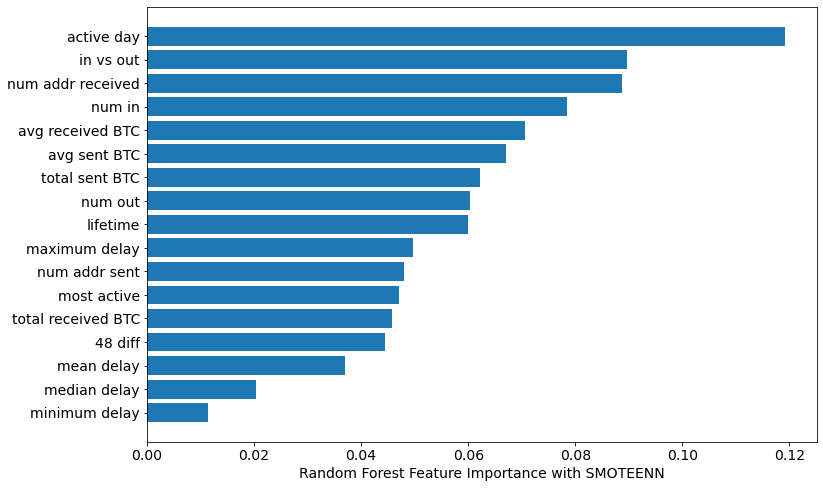

In [94]:
sorted_idx = rfc.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], rfc.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance with SMOTEENN")

### ADASYN

In [95]:
rfc.fit(X_train_syn, y_train_syn)

RandomForestClassifier(min_samples_leaf=3)

In [96]:
rfc.score(X_test, y_test)

0.8577712609970675

In [97]:
rfc_pred_syn = rfc.predict(X_test)

In [98]:
get_score(rfc_pred_syn, y_test)


    Recall = 0.8577712609970675,
    F1_score = 0.8502548598949072
    precision = 0.8475176952127741 
    accuracy = 0.8577712609970675
    


[[259   5  24]
 [ 26  16  10]
 [ 22  10 310]]


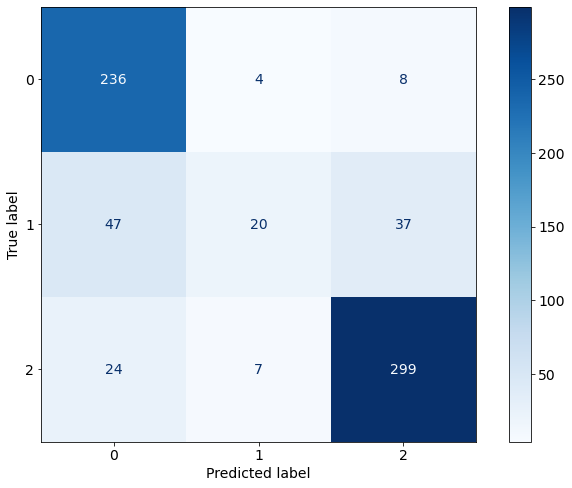

In [99]:
cm_syn_rf = confusion_matrix(rfc_pred_syn, y_test)
print(cm_syn_rf)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_sme_rf )#, display_labels=class_names)#cmap=plt.cm.Blues
disp = disp.plot(cmap=plt.cm.Blues)#,values_format='g')
plt.show()
#plt.savefig('confusion_matrix_adasyn_rf.png')

In [100]:
print(classification_report(y_test,rfc_pred_syn))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       307
           1       0.31      0.52      0.39        31
           2       0.91      0.90      0.90       344

    accuracy                           0.86       682
   macro avg       0.70      0.75      0.72       682
weighted avg       0.88      0.86      0.87       682



In [101]:
### important feature
rfc.feature_importances_

array([0.0597832 , 0.05584749, 0.06640541, 0.11470526, 0.04970311,
       0.05206672, 0.07886481, 0.05002618, 0.023193  , 0.04206115,
       0.01890724, 0.04637136, 0.04937216, 0.04069647, 0.09345332,
       0.09894023, 0.05960288])

Text(0.5, 0, 'Random Forest Feature Importance with ADASYN')

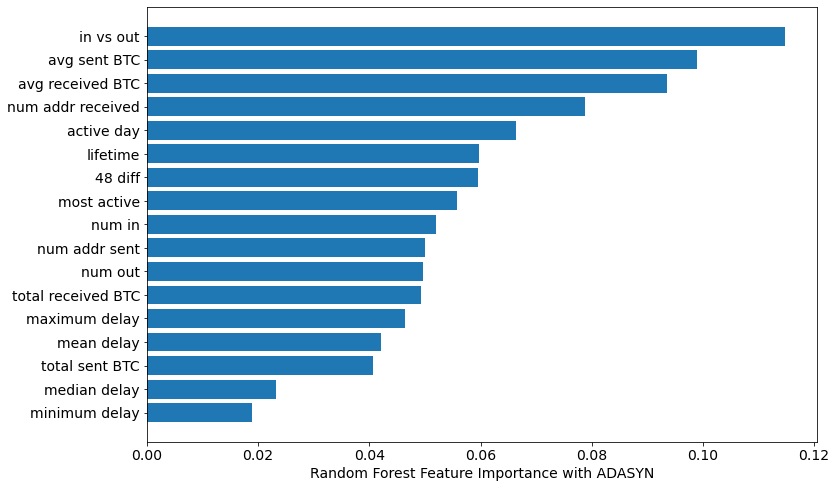

In [102]:
sorted_idx = rfc.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], rfc.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance with ADASYN")

### TomekLinks

In [103]:
rfc.fit(X_train_tme, y_train_tme)

RandomForestClassifier(min_samples_leaf=3)

In [104]:
rfc.score(X_test, y_test)

0.8841642228739003

In [105]:
rfc_pred_tme = rfc.predict(X_test)

In [106]:
get_score(rfc_pred_tme, y_test)


    Recall = 0.8841642228739003,
    F1_score = 0.8939522867329761
    precision = 0.912401674979101 
    accuracy = 0.8841642228739003
    


[[265  13  13]
 [  0   7   0]
 [ 42  11 331]]


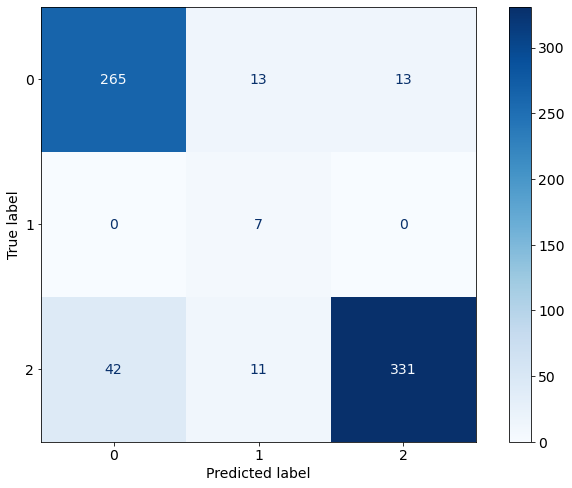

In [107]:
cm_tme_rf = confusion_matrix(rfc_pred_tme, y_test)
print(cm_tme_rf)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tme_rf )#, display_labels=class_names)#cmap=plt.cm.Blues
disp = disp.plot(cmap=plt.cm.Blues)#,values_format='g')
plt.show()
#plt.savefig('confusion_matrix_tomeklinks_rf.png')

In [108]:
print(classification_report(y_test,rfc_pred_tme))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89       307
           1       1.00      0.23      0.37        31
           2       0.86      0.96      0.91       344

    accuracy                           0.88       682
   macro avg       0.92      0.68      0.72       682
weighted avg       0.89      0.88      0.87       682



In [109]:
### important feature
rfc.feature_importances_


array([0.03262819, 0.029561  , 0.06810218, 0.1797882 , 0.03676762,
       0.05660182, 0.0544583 , 0.02657787, 0.00713668, 0.01471981,
       0.00552966, 0.03754217, 0.09228409, 0.08106054, 0.12567919,
       0.1159722 , 0.03559047])

Text(0.5, 0, 'Random Forest Feature Importance with TomekLinks')

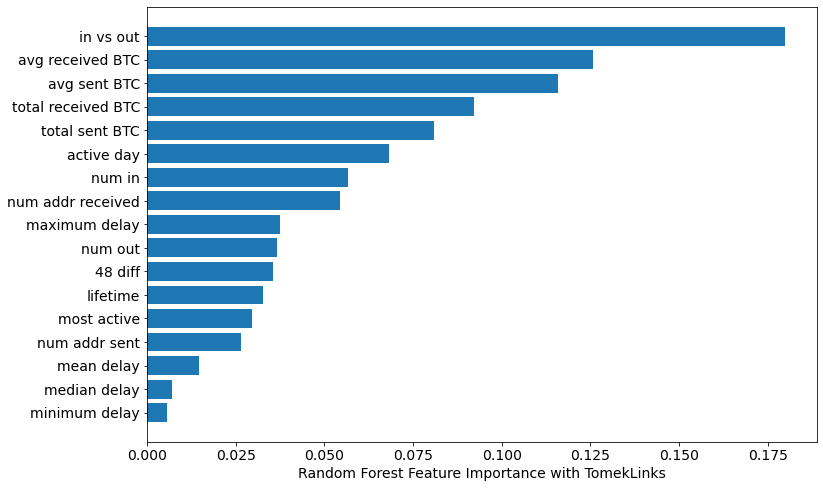

In [110]:
sorted_idx = rfc.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], rfc.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance with TomekLinks")

# Ridge Regression  

In [111]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures

In [112]:
poly = PolynomialFeatures(degree=2)

In [113]:
ridge = RidgeClassifier()

### oversampling 

In [114]:
poly.fit(X_over)
X_train_over_poly = poly.transform(X_over)
X_test_over_poly = poly.transform(X_test)
ridge.fit(X_train_over_poly, y_over)
poly_pred_over = ridge.predict(X_test_over_poly)
get_score(poly_pred_over, y_test)


    Recall = 0.6011730205278593,
    F1_score = 0.6077944833658937
    precision = 0.6642298513496142 
    accuracy = 0.6011730205278593
    


[[123   7  34]
 [ 18  12  35]
 [166  12 275]]


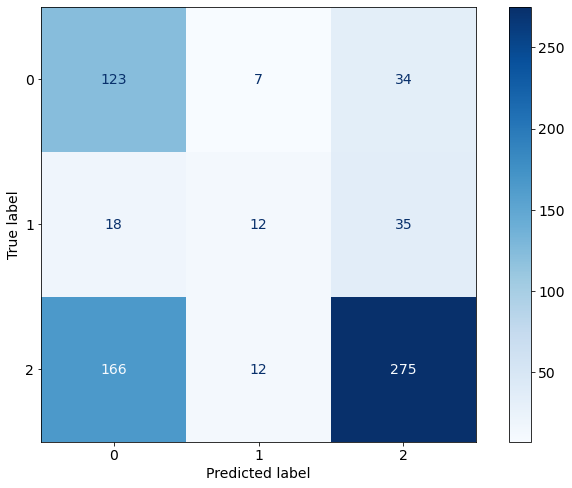

              precision    recall  f1-score   support

           0       0.40      0.75      0.52       164
           1       0.39      0.18      0.25        65
           2       0.80      0.61      0.69       453

    accuracy                           0.60       682
   macro avg       0.53      0.51      0.49       682
weighted avg       0.66      0.60      0.61       682



In [115]:
cm_over_ridge = confusion_matrix(poly_pred_over, y_test)
print(cm_over_ridge)

## plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm_over_ridge)#, display_labels=class_names)#cmap=plt.cm.Blues
disp = disp.plot(cmap=plt.cm.Blues)#,values_format='g')
plt.show()
#plt.savefig('confusion_matrix_ridge_smote.png')

## Report
print(classification_report(poly_pred_over,y_test))

In [116]:
### undersampling

In [117]:
poly.fit(X_under)
X_train_under_poly = poly.transform(X_under)
X_test_under_poly = poly.transform(X_test)
ridge.fit(X_train_under_poly, y_under)
poly_pred_under = ridge.predict(X_test_under_poly)
get_score(poly_pred_under, y_test)

cm_under_ridge = confusion_matrix(poly_pred_under, y_test)
print(cm_under_ridge)


    Recall = 0.5865102639296188,
    F1_score = 0.5951037098926435
    precision = 0.6553891498560733 
    accuracy = 0.5865102639296188
    
[[116   7  36]
 [ 18  12  36]
 [173  12 272]]


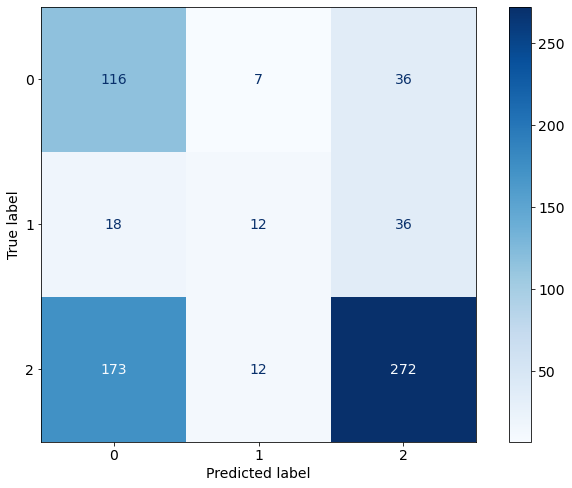

              precision    recall  f1-score   support

           0       0.38      0.73      0.50       159
           1       0.39      0.18      0.25        66
           2       0.79      0.60      0.68       457

    accuracy                           0.59       682
   macro avg       0.52      0.50      0.47       682
weighted avg       0.66      0.59      0.60       682



In [118]:
## plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm_under_ridge)#, display_labels=class_names)#cmap=plt.cm.Blues
disp = disp.plot(cmap=plt.cm.Blues)#,values_format='g')
plt.show()
#plt.savefig('confusion_matrix_ridge_smote.png')

## Repport 
print(classification_report(poly_pred_under,y_test))

### smote 

In [119]:
poly.fit(X_train_smote)

PolynomialFeatures()

In [120]:
X_train_smote_poly = poly.transform(X_train_smote)
X_test_smote_poly = poly.transform(X_test)

In [121]:
ridge.fit(X_train_smote_poly, y_train_smote)

RidgeClassifier()

In [122]:
poly_pred_smote = ridge.predict(X_test_smote_poly)

In [123]:
get_score(poly_pred_smote, y_test)


    Recall = 0.5967741935483871,
    F1_score = 0.5996993760625657
    precision = 0.655924554323408 
    accuracy = 0.5967741935483871
    


[[122   6  33]
 [ 25  13  39]
 [160  12 272]]


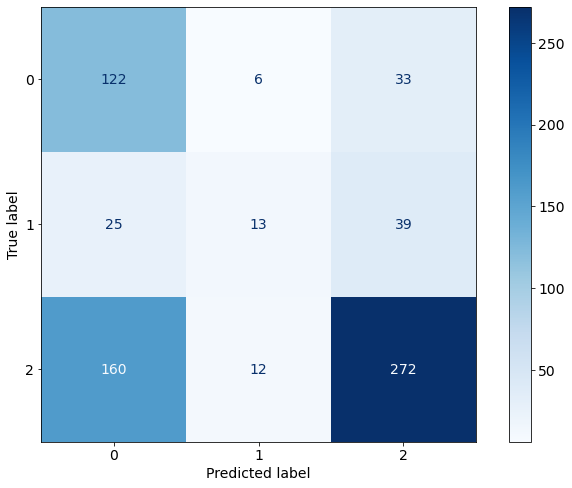

In [124]:
cm_smote_ridge = confusion_matrix(poly_pred_smote, y_test)
print(cm_smote_ridge)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_smote_ridge)#, display_labels=class_names)#cmap=plt.cm.Blues
disp = disp.plot(cmap=plt.cm.Blues)#,values_format='g')
plt.show()
#plt.savefig('confusion_matrix_ridge_smote.png')

In [125]:
print(classification_report(poly_pred_smote,y_test))

              precision    recall  f1-score   support

           0       0.40      0.76      0.52       161
           1       0.42      0.17      0.24        77
           2       0.79      0.61      0.69       444

    accuracy                           0.60       682
   macro avg       0.54      0.51      0.48       682
weighted avg       0.66      0.60      0.60       682



### STOMEENN

In [126]:
poly.fit(X_train_sme)

PolynomialFeatures()

In [127]:
X_train_sme_poly = poly.transform(X_train_sme)
X_test_sme_poly = poly.transform(X_test)

In [128]:
ridge.fit(X_train_sme_poly, y_train_sme)

RidgeClassifier()

In [129]:
poly_pred_sme = ridge.predict(X_test_sme_poly)


In [130]:
get_score(poly_pred_sme, y_test)


    Recall = 0.5073313782991202,
    F1_score = 0.48914894661749214
    precision = 0.6419313999648193 
    accuracy = 0.5073313782991202
    


[[ 78   3  13]
 [ 99  21  84]
 [130   7 247]]


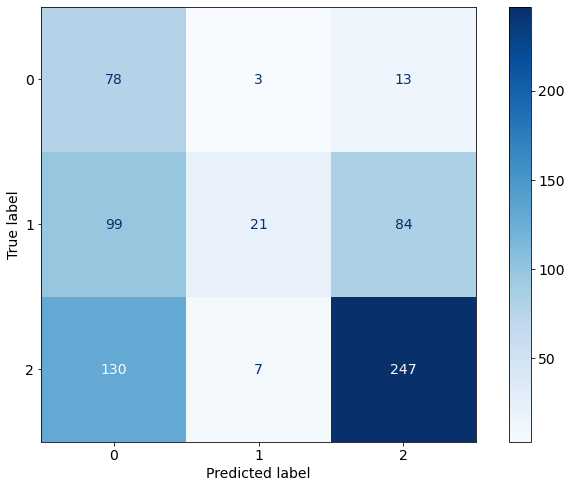

In [131]:
cm_sme_ridge = confusion_matrix(poly_pred_sme, y_test)
print(cm_sme_ridge)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_sme_ridge)#, display_labels=class_names)#cmap=plt.cm.Blues
disp = disp.plot(cmap=plt.cm.Blues)#,values_format='g')
plt.show()
#plt.savefig('confusion_matrix_ridge_smoteenn.png')

In [132]:
print(classification_report(poly_pred_sme,y_test))

              precision    recall  f1-score   support

           0       0.25      0.83      0.39        94
           1       0.68      0.10      0.18       204
           2       0.72      0.64      0.68       384

    accuracy                           0.51       682
   macro avg       0.55      0.53      0.42       682
weighted avg       0.64      0.51      0.49       682



### ADASYN

In [133]:
poly.fit(X_train_syn)

PolynomialFeatures()

In [134]:
X_train_syn_poly = poly.transform(X_train_syn)
X_test_syn_poly = poly.transform(X_test)

In [135]:
ridge.fit(X_train_syn_poly, y_train_syn)

RidgeClassifier()

In [136]:
poly_pred_syn = ridge.predict(X_test_syn_poly)

In [137]:
get_score(poly_pred_syn, y_test)


    Recall = 0.5689149560117303,
    F1_score = 0.5713201008463109
    precision = 0.6663344303794003 
    accuracy = 0.5689149560117303
    


[[101   3  24]
 [ 45  19  52]
 [161   9 268]]


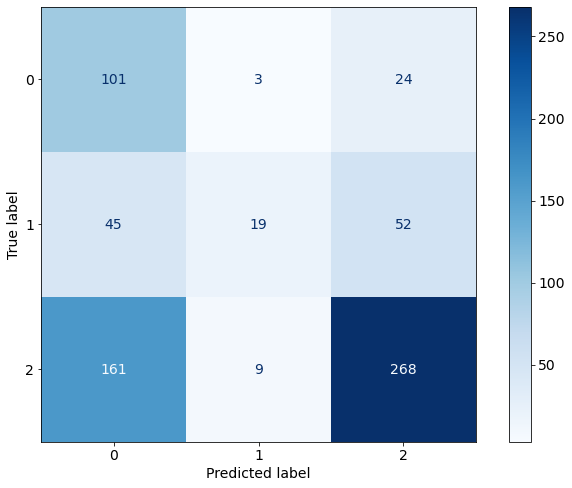

In [138]:
cm_syn_ridge = confusion_matrix(poly_pred_syn, y_test)
print(cm_syn_ridge)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_syn_ridge)#, display_labels=class_names)#cmap=plt.cm.Blues
disp = disp.plot(cmap=plt.cm.Blues)#,values_format='g')
plt.show()
#plt.savefig('confusion_matrix_ridge_adasyn.png')

In [139]:
print(classification_report(poly_pred_syn,y_test))

              precision    recall  f1-score   support

           0       0.33      0.79      0.46       128
           1       0.61      0.16      0.26       116
           2       0.78      0.61      0.69       438

    accuracy                           0.57       682
   macro avg       0.57      0.52      0.47       682
weighted avg       0.67      0.57      0.57       682



### TomekLinks

In [140]:
poly.fit(X_train_tme)

PolynomialFeatures()

In [141]:
X_train_tme_poly = poly.transform(X_train_tme)
X_test_tme_poly = poly.transform(X_test)

In [142]:
ridge.fit(X_train_tme_poly, y_train_tme)

RidgeClassifier()

In [143]:
poly_pred_tme = ridge.predict(X_test_tme_poly)

In [144]:
get_score(poly_pred_tme, y_test)


    Recall = 0.6495601173020528,
    F1_score = 0.6875810569721444
    precision = 0.8205881518523145 
    accuracy = 0.6495601173020528
    


[[114   9  19]
 [  0   4   0]
 [193  18 325]]


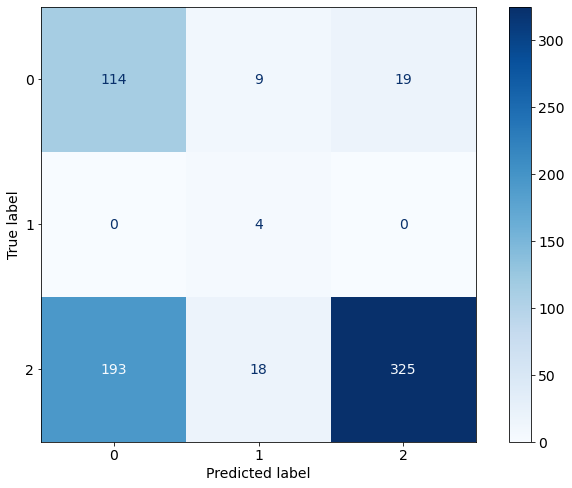

In [145]:
cm_tme_ridge = confusion_matrix(poly_pred_tme, y_test)
print(cm_tme_ridge)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tme_ridge)#, display_labels=class_names)#cmap=plt.cm.Blues
disp = disp.plot(cmap=plt.cm.Blues)#,values_format='g')
plt.show()
#plt.savefig('confusion_matrix_ridge_tomeklinks.png')

In [146]:
print(classification_report(poly_pred_tme,y_test))

              precision    recall  f1-score   support

           0       0.37      0.80      0.51       142
           1       0.13      1.00      0.23         4
           2       0.94      0.61      0.74       536

    accuracy                           0.65       682
   macro avg       0.48      0.80      0.49       682
weighted avg       0.82      0.65      0.69       682

